In [2]:
#import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score
import scipy.cluster.hierarchy as sch
from kneed import KneeLocator

In [3]:
#import dataset

url = ("https://raw.githubusercontent.com/vanggelina10/Exercise_W8_DataMining/main/Property%20Dataset%20-%20Clustering.csv")
data = pd.read_csv(url, sep=';')
data

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Below Standard,Setro Baru Utara,"30,00","60,00",2.0,1.0,2,287799000,Belum,NaN,Standard,< 1 Mobil
2,Standard,Kenjeran,"170,00","170,00",5.0,4.0,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,"187,00","250,00",5.0,5.0,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,"350,00","600,00",5.0,5.0,2,5000000000,Belum,Barat,Standard,1-2 Mobil
...,...,...,...,...,...,...,...,...,...,...,...,...
303,Standard,Gununganyar,47,34,2.0,1.0,1,450000000,Belum,Utara,NaN,> 2 Mobil
304,Sangat Premium,Sukolilo,300,212,4.0,4.0,1,5250000000,Belum,Selatan,NaN,NaN
305,Premium,Mulyorejo,102,156,4.0,2.0,2,1950000000,Belum,Selatan,Standard,1-2 Mobil
306,Standard,Sukolilo,98,170,4.0,3.0,2,1550000000,Belum,NaN,Standard,> 2 Mobil


In [4]:
#cek duplicate

data.duplicated().sum()

2

In [5]:
#cek data info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area Category                  307 non-null    object 
 1   Nama Daerah                    307 non-null    object 
 2   Luas Tanah (m2)                307 non-null    object 
 3   Luas Bangunan (m2)             307 non-null    object 
 4   Jumlah Kamar                   307 non-null    float64
 5   Jumlah Kamar Mandi             306 non-null    float64
 6   Tingkat/Lantai                 306 non-null    object 
 7   Harga Penawaran (dari Owner)   307 non-null    object 
 8   Terjual/Belum                  307 non-null    object 
 9   Arah Hadap Rumah               225 non-null    object 
 10  Posisi Rumah                   192 non-null    object 
 11  Lebar Jalan Depan Rumah (ROW)  266 non-null    object 
dtypes: float64(2), object(10)
memory usage: 29.0+ KB


In [6]:
#cek data kosong

data.isna().sum()

Area Category                      1
Nama Daerah                        1
Luas Tanah (m2)                    1
Luas Bangunan (m2)                 1
Jumlah Kamar                       1
Jumlah Kamar Mandi                 2
Tingkat/Lantai                     2
Harga Penawaran (dari Owner)       1
Terjual/Belum                      1
Arah Hadap Rumah                  83
Posisi Rumah                     116
Lebar Jalan Depan Rumah (ROW)     42
dtype: int64

In [7]:
data.describe()

,Jumlah Kamar,Jumlah Kamar Mandi
count,307.000000,306.000000
mean,4.276873,3.339869
std,1.646412,1.632311
min,1.000000,1.000000
25%,3.000000,2.000000
50%,4.000000,3.000000
75%,5.000000,4.000000
max,13.000000,13.000000


In [8]:
data = data.dropna(subset = ['Tingkat/Lantai ','Jumlah Kamar Mandi'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305 entries, 1 to 307
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area Category                  305 non-null    object 
 1   Nama Daerah                    305 non-null    object 
 2   Luas Tanah (m2)                305 non-null    object 
 3   Luas Bangunan (m2)             305 non-null    object 
 4   Jumlah Kamar                   305 non-null    float64
 5   Jumlah Kamar Mandi             305 non-null    float64
 6   Tingkat/Lantai                 305 non-null    object 
 7   Harga Penawaran (dari Owner)   305 non-null    object 
 8   Terjual/Belum                  305 non-null    object 
 9   Arah Hadap Rumah               225 non-null    object 
 10  Posisi Rumah                   192 non-null    object 
 11  Lebar Jalan Depan Rumah (ROW)  266 non-null    object 
dtypes: float64(2), object(10)
memory usage: 31.0+ KB


In [9]:
#random data 

import random
arah_rumah = ["Utara","Selatan","Timur","Barat"]
print(random.choice(arah_rumah))

posisi_rumah = ["Tusuk Sate","Tikungan/Hook","Tusuk Belakang/Membelakangi Jalan","Kantong Belakang/Ngantong","Standard","Cul De Sac/Ujung Gang Buntu"]
print(random.choice(posisi_rumah))

lebar_rumah = ["< 1 Mobil","1-2 Mobil","> 2 Mobil"]
print(random.choice(lebar_rumah))

Timur
Kantong Belakang/Ngantong
1-2 Mobil


In [10]:
#menginput missing value

data.dropna(subset=["Jumlah Kamar Mandi"],inplace=True)
data.dropna(subset=["Tingkat/Lantai "],inplace=True)

data["Arah Hadap Rumah"] = data['Arah Hadap Rumah'].fillna(random.choice(arah_rumah))
data["Posisi Rumah"] = data['Posisi Rumah'].fillna(random.choice(posisi_rumah))
data["Lebar Jalan Depan Rumah (ROW)"] = data['Lebar Jalan Depan Rumah (ROW)'].fillna(random.choice(lebar_rumah))

<ipython-input-10-1e9d638b1029>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=["Jumlah Kamar Mandi"],inplace=True)
<ipython-input-10-1e9d638b1029>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=["Tingkat/Lantai "],inplace=True)
<ipython-input-10-1e9d638b1029>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Arah Hadap Rumah"] = dat

In [11]:
#cek missing value sesudah di input

data.isna().sum()

Area Category                    0
Nama Daerah                      0
Luas Tanah (m2)                  0
Luas Bangunan (m2)               0
Jumlah Kamar                     0
Jumlah Kamar Mandi               0
Tingkat/Lantai                   0
Harga Penawaran (dari Owner)     0
Terjual/Belum                    0
Arah Hadap Rumah                 0
Posisi Rumah                     0
Lebar Jalan Depan Rumah (ROW)    0
dtype: int64

In [12]:
#label encoder
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

data['Area Category'] = lb.fit_transform(data['Area Category'])
data['Nama Daerah'] = lb.fit_transform(data['Nama Daerah'])
data['Luas Tanah (m2)'] = lb.fit_transform(data['Luas Tanah (m2)'])
data['Luas Bangunan (m2)'] = lb.fit_transform(data['Luas Bangunan (m2)'])
data['Jumlah Kamar'] = lb.fit_transform(data['Jumlah Kamar'])
data['Jumlah Kamar Mandi'] = lb.fit_transform(data['Jumlah Kamar Mandi'])
data["Tingkat/Lantai "] = lb.fit_transform(data["Tingkat/Lantai "])
data['Harga Penawaran (dari Owner)'] = lb.fit_transform(data['Harga Penawaran (dari Owner)'])
data['Terjual/Belum'] = lb.fit_transform(data['Terjual/Belum'])
data['Arah Hadap Rumah'] = lb.fit_transform(data['Arah Hadap Rumah'])
data['Posisi Rumah'] = lb.fit_transform(data['Posisi Rumah'])
data['Lebar Jalan Depan Rumah (ROW)'] = lb.fit_transform(data['Lebar Jalan Depan Rumah (ROW)'])

<ipython-input-12-f31c62627389>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Area Category'] = lb.fit_transform(data['Area Category'])
<ipython-input-12-f31c62627389>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Nama Daerah'] = lb.fit_transform(data['Nama Daerah'])
<ipython-input-12-f31c62627389>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [13]:
#scaling

from sklearn.preprocessing import StandardScaler

sd_scaler = StandardScaler()
data_scale = sd_scaler.fit_transform(data.to_numpy())
data_scale = pd.DataFrame(data_scale, columns=['Area Category','Nama Daerah','Luas Tanah (m2)','Luas Bangunan (m2)','Jumlah Kamar','Jumlah Kamar Mandi','Tingkat/Lantai','Harga Penawaran (dari Owner)','Terjual/Belum','Arah Hadap Rumah','Posisi Rumah','Lebar Jalan Depan Rumah (ROW)'])
data_scale.head(5)

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,-1.681800,1.045847,-0.035993,1.143701,-1.416808,-1.487025,0.288036,-0.060174,0.0,-1.140474,-0.822262,-0.053691
1,1.008492,-0.356217,-0.740240,-0.754527,0.453869,0.426657,0.288036,-0.167127,0.0,-0.300270,-2.828580,-1.077181
2,0.111728,-0.356217,-0.595248,-0.215524,0.453869,1.064551,0.288036,0.046779,0.0,1.380139,-0.822262,-1.077181
3,-0.785036,-0.356217,0.233278,1.190570,0.453869,1.064551,0.288036,0.902400,0.0,-1.140474,-0.822262,-1.077181
4,-0.785036,-0.356217,0.626827,1.003091,0.453869,1.702445,0.288036,-1.643074,0.0,-1.140474,-0.822262,-1.077181


In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(init="random",n_clusters=3,max_iter=300,random_state=42)

model = kmeans.fit_predict(data_scale)
model
data['K-MEANS'] = model
data

<ipython-input-14-21e2e9da8529>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['K-MEANS'] = model


,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),K-MEANS
1,0,99,75,118,1,0,2,80,0,0,2,1,0
2,3,48,41,37,4,3,2,75,0,1,0,0,1
3,2,48,48,60,4,4,2,85,0,3,2,0,2
4,1,48,88,120,4,4,2,125,0,0,2,0,2
5,1,48,107,112,4,5,2,6,0,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,3,32,108,80,1,0,0,115,0,3,4,2,0
304,2,104,76,46,3,3,0,126,0,1,4,2,1
305,1,72,3,28,3,1,2,51,0,1,2,0,1
306,3,104,166,36,3,2,2,31,0,0,2,2,1


C:\Users\Win10\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


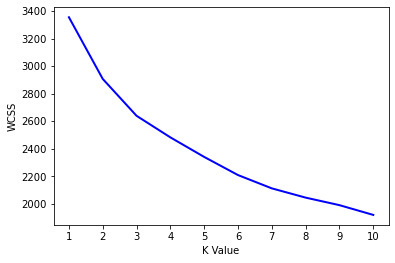

In [15]:
wcss=[]

X2=data_scale
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="random")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)  
    
plt.plot(range(1,11),wcss, linewidth=2, color="blue")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [16]:
findk = KneeLocator(range(1,11), wcss, curve="convex",direction="decreasing")

print("The best K Value for you model is", findk.elbow)

The best K Value for you model is 3


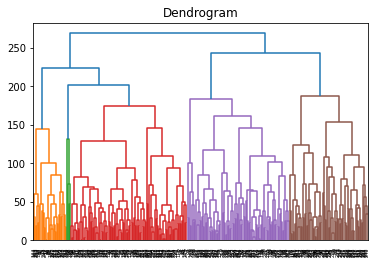

In [17]:
dendro = sch.dendrogram(sch.linkage(data, method = 'complete'))
plt.title('Dendrogram')
plt.show()

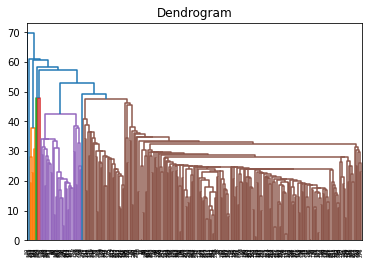

In [22]:
dendro = sch.dendrogram(sch.linkage(data, method = 'single'))
plt.title('Dendrogram')
plt.show()

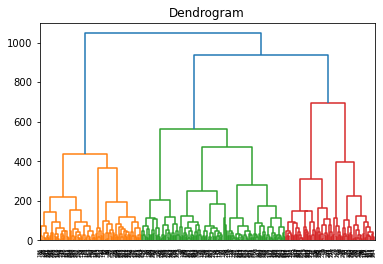

In [23]:
dendro = sch.dendrogram(sch.linkage(data, method = 'ward'))
plt.title('Dendrogram')
plt.show()

In [19]:
from sklearn.cluster import AgglomerativeClustering

hc_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean')
Huh = hc_model.fit_predict(data_scale)

In [20]:
data1 = data.copy()
data1['Hierarchical'] = Huh
data1

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),K-MEANS,Hierarchical
1,0,99,75,118,1,0,2,80,0,0,2,1,0,0
2,3,48,41,37,4,3,2,75,0,1,0,0,1,2
3,2,48,48,60,4,4,2,85,0,3,2,0,2,2
4,1,48,88,120,4,4,2,125,0,0,2,0,2,2
5,1,48,107,112,4,5,2,6,0,0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,3,32,108,80,1,0,0,115,0,3,4,2,0,0
304,2,104,76,46,3,3,0,126,0,1,4,2,1,0
305,1,72,3,28,3,1,2,51,0,1,2,0,1,2
306,3,104,166,36,3,2,2,31,0,0,2,2,1,0


In [25]:
#kesimpulan

data1.groupby('Hierarchical').agg(
    Area_Category=('Area Category',pd.Series.mode),
    Nama_Daerah=('Nama Daerah',pd.Series.mode),
    Luas_tanah=('Luas Tanah (m2)',pd.Series.mean),
    Luas_Bangunan=('Luas Bangunan (m2)',pd.Series.mean),
    Jumlah_Kamar=('Jumlah Kamar',pd.Series.mean),
    Jumlah_Kamar_Mandi=('Jumlah Kamar Mandi',pd.Series.mean),
    Tingkat=('Tingkat/Lantai ',pd.Series.mean),
    Harga=('Harga Penawaran (dari Owner)',pd.Series.mean),
    Terjual=('Terjual/Belum',pd.Series.mode),
    Hadap=('Arah Hadap Rumah',pd.Series.mode),
    Letak=('Posisi Rumah',pd.Series.mode),
    Luas=('Lebar Jalan Depan Rumah (ROW)',pd.Series.mean), Count = ("K-MEANS",'count'))

,Area_Category,Nama_Daerah,Luas_tanah,Luas_Bangunan,Jumlah_Kamar,Jumlah_Kamar_Mandi,Tingkat,Harga,Terjual,Hadap,Letak,Luas,Count
Hierarchical,,,,,,,,,,,,,
0,3,11,99.747748,69.558559,1.864865,1.063063,1.144144,76.108108,0,0,2,1.000000,111
1,1,11,70.305970,72.305970,4.283582,3.305970,2.126866,86.373134,0,3,4,1.567164,134
2,3,72,48.533333,61.583333,3.616667,2.500000,1.816667,87.266667,0,1,2,0.000000,60
